<a href="https://colab.research.google.com/github/elmarsmn/ML/blob/main/California_house_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://raw.githubusercontent.com/Rstam59/TaskDataRepoForStudents/main/housing.csv

--2024-06-19 12:10:11--  https://raw.githubusercontent.com/Rstam59/TaskDataRepoForStudents/main/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv’

housing.csv         100%[===================>]   1.36M  --.-KB/s    in 0.07s   

2024-06-19 12:10:11 (20.1 MB/s) - ‘housing.csv’ saved [1423529/1423529]



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
hous = pd.read_csv("/content/housing.csv")
hous

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
X = hous.drop("median_house_value",axis = 1)
y = hous["median_house_value"].copy()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)


In [ ]:
cat_features = X_train.select_dtypes(exclude = [np.number]).columns
num_features = X_train.select_dtypes(include = [np.number]).columns

In [ ]:
cat_pipeline = Pipeline([
    ("impute",SimpleImputer(strategy = "constant",fill_value = "Missing")),
    ("one_hot",OneHotEncoder(handle_unknown = "ignore"))
])

num_pipeline = Pipeline([
    ("impute",SimpleImputer(strategy = "median")),
    ("scaler",StandardScaler())
])

transformer = ColumnTransformer([
    ("cat_pipeline",cat_pipeline,cat_features),
    ("num_pipeline",num_pipeline,num_features)
])

In [ ]:
cat_pipeline = Pipeline([
    ("impute",SimpleImputer(strategy = "most_frequent")),
    ("one_hot",OneHotEncoder(handle_unknown = "ignore"))
])

num_pipeline = Pipeline([
    ("impute",SimpleImputer(strategy = "median")),
    ("scaler",StandardScaler())
])

transformer = ColumnTransformer([
    ("cat_pipeline",cat_pipeline,cat_features),
    ("num_pipeline",num_pipeline,num_features)
])

In [ ]:
X_train_transformed = transformer.fit_transform(X_train)
feature_names = transformer.get_feature_names_out()
X_train_transformed_df = pd.DataFrame(X_train_transformed,columns = feature_names)

In [ ]:
X_test_transformed = transformer.transform(X_test)
X_test_transformed_df = pd.DataFrame(X_test_transformed,columns = feature_names)

In [ ]:
rnd_reg = RandomForestRegressor()
np.random.seed(42)
rnd_reg.fit(X_train_transformed_df,y_train)

RandomForestRegressor()

In [ ]:
rnd_reg.score(X_train_transformed_df,y_train)

0.9747334743401126

In [ ]:
rnd_reg.score(X_test_transformed_df,y_test)

0.8290463353772661

In [ ]:
rnd_reg.predict(X_test_transformed_df.iloc[[10]])

array([257390.])

In [ ]:
y_test.iloc[[10]]

3597    238600.0
Name: median_house_value, dtype: float64

In [ ]:
from sklearn.metrics import mean_squared_error
preds = rnd_reg.predict(X_test_transformed_df)
mse = mean_squared_error(y_test,preds)
rmse = np.sqrt(mse)
rmse

49139.635418742786

In [ ]:
for i in range(50,150,20):
  rnd_reg = RandomForestRegressor(n_estimators = i)
  rnd_reg.fit(X_train_transformed,y_train)
  preds = rnd_reg.predict(X_test_transformed_df)
  mse = mean_squared_error(y_test,preds)
  rmse = np.sqrt(mse)
  print(f"n_estimators = {i},RMSE = {rmse}")



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


n_estimators = 50,RMSE = 49687.485382743194


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


n_estimators = 70,RMSE = 49401.6455279858


KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rnd_reg,X_train_transformed,y_train,scoring = 'neg_mean_squared_error',cv = 5)
rmse_scores = np.sqrt(-scores)

In [ ]:
rmse_scores

array([52520.22280493, 51030.9933417 , 50493.16865399, 47869.37596439,
       46853.66729288])

In [ ]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

param_grid = {
    "n_estimators" : [100,200,300],
    "max_depth": [10,20,None],
    "min_samples_split" : [2,10,20],
    "min_samples_leaf" : [2,5,10],
    "max_features" : ["auto","sqrt","log2"]
}

grid_search = GridSearchCV(rnd_reg,param_grid,cv = 3,scoring = "neg_mean_squared_error")
grid_search.fit(X_train_transformed[:1000],y_train[:1000])

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

KeyboardInterrupt: 

In [ ]:
grid_search.best_params_

{'max_depth': None,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

In [ ]:
best_model = grid_search.best_estimator_.fit(X_train_transformed,y_train)

NameError: name 'grid_search' is not defined

In [ ]:
best_model.score(X_test_transformed,y_test)

0.8203459673471478

In [ ]:
from sklearn.ensemble import IsolationForest


In [ ]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(random_state=42)
outlier_pred = isolation_forest.fit_predict(X_train_transformed_df)

In [ ]:
X_train_transformed = X_train_transformed_df.iloc[outlier_pred == 1]
y_train = y_train.iloc[outlier_pred == 1]

In [ ]:
best_model = grid_search.best_estimator_.fit(X_train_transformed,y_train)

In [ ]:
best_model.score(X_test_transformed,y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


0.7938039207407579

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [ ]:
num_pipeline = Pipeline([
    ("impute",SimpleImputer(strategy = "median")),
    ("scaler",StandardScaler())
])

transformer = ColumnTransformer([
    ("num_pipeline",num_pipeline,num_features)
])

In [ ]:
full_pipeline = Pipeline([
    ("preprocessing",transformer),
    ("rfr",RandomForestRegressor())
])

In [ ]:
full_pipeline.fit(X_train,y_train)

In [ ]:
full_pipeline.score(X_train,y_train)

0.9751499971204318

In [ ]:
full_pipeline.score(X_test,y_test)

0.7989444575203464

In [ ]:
from sklearn.model_selection import RandomizedSearchCV


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    "rfr__n_estimators" : [50,100,150],
    "rfr__criterion" : ["squared_error","absolute_error","friedman_mse","poisson"],
    "rfr__n_jobs":[-1]
}
randCV = RandomizedSearchCV(full_pipeline,param_grid,cv=5)
randCV.fit(X_train[:1000],y_train[:1000])

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('num_pipeline',
                                                                               Pipeline(steps=[('impute',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object'))])),
                                             ('rfr', RandomForestRegressor())]),
                   param_distributions={'rfr__criterion': ['squared_error',
                                                           'absolute_error',
                                                           'friedman_mse',
                                                           'poisson'],
                                        'rfr__n_estimators': [50, 100, 150],
                                        'rfr__n_jobs': [-1]})

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

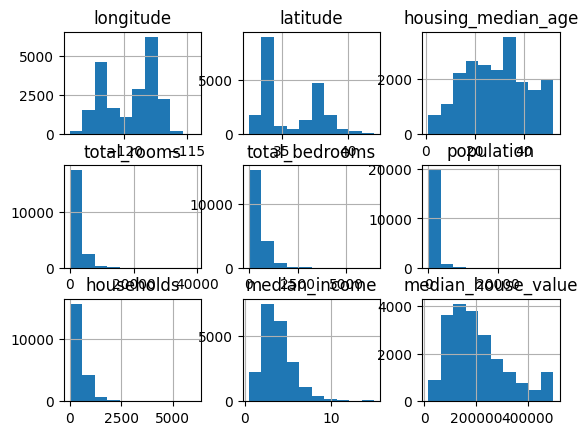

In [ ]:
hous.hist()

In [ ]:
X = hous.drop("median_house_value",axis = 1)
y = hous["median_house_value"].copy()

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)
X_train.shape, X_test.shape,y_train.shape,y_test.shape


((16512, 9), (4128, 9), (16512,), (4128,))

<Axes: >

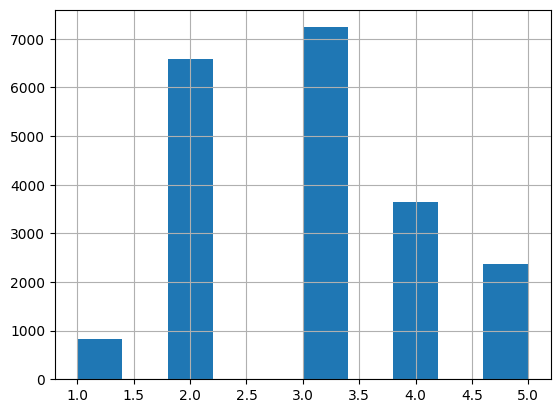

In [ ]:
hous["income_cat"] = pd.cut(hous["median_income"],
                            bins = [0.,1.5,3.0,4.5,6,np.inf],
                            labels = [1,2,3,4,5])
hous["income_cat"].hist()

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, stratify = hous["income_cat"])
X_train.shape, X_test.shape,y_train.shape,y_test.shape

((16512, 10), (4128, 10), (16512,), (4128,))

In [ ]:
hous.corr(numeric_only = True)["median_house_value"].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value","median_income","total_rooms","housing_median_age"]
scatter_matrix(hous[attributes],figsize = (12,8));

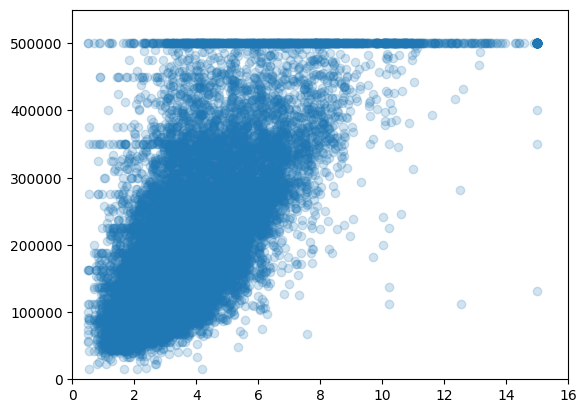

In [ ]:
plt.scatter(hous["median_income"],hous["median_house_value"],alpha = 0.2)
plt.axis([0,16,0,550000])
plt.show()

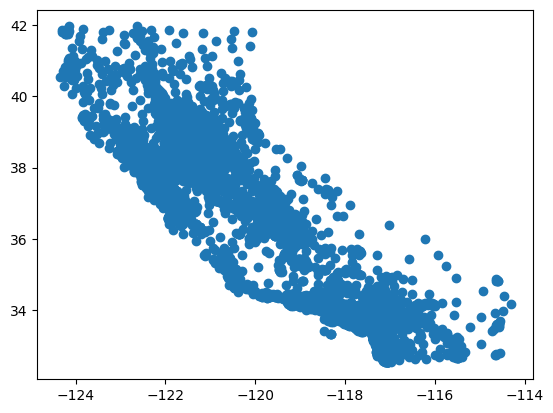

In [ ]:
plt.scatter(hous.longitude,hous.latitude)


<Axes: xlabel='longitude', ylabel='latitude'>

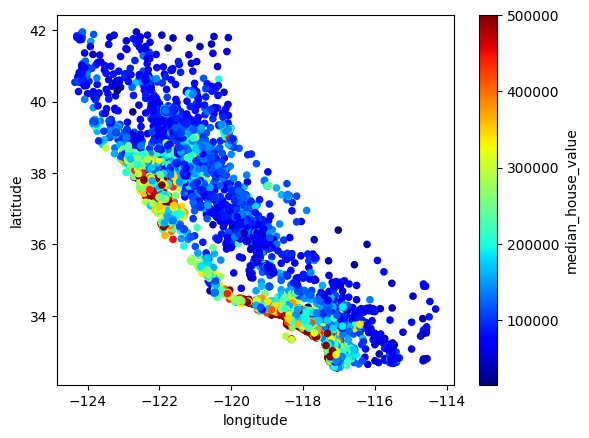

In [ ]:
hous.plot(kind = "scatter",x = "longitude",y = "latitude",c = "median_house_value",cmap = "jet",colorbar = True)

<Axes: xlabel='longitude', ylabel='latitude'>

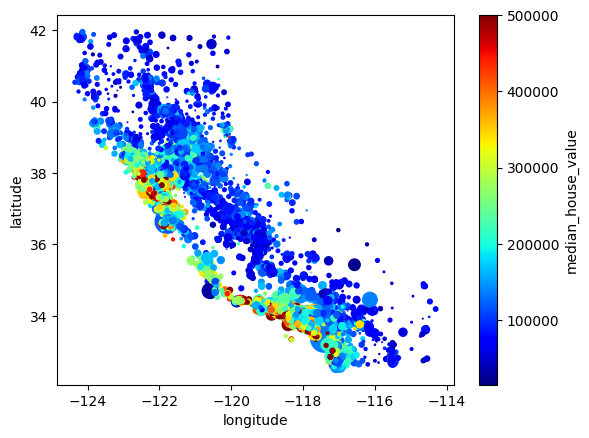

In [ ]:
hous.plot(kind = "scatter",x = "longitude",y = "latitude",c = "median_house_value",cmap = "jet",colorbar = True,  s = hous["population"]/100)

In [ ]:
hous["rooms_per_house"] = hous["total_rooms"] / hous["households"]
hous["bedrooms_ration"] = hous["total_bedrooms"] / hous["total_rooms"]
hous["people_per_house"] = hous["population"] / hous["households"]

In [ ]:
hous.corr(numeric_only = True)["median_house_value"].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.662812
total_rooms           0.176921
households            0.101923
total_bedrooms        0.085963
population            0.031235
housing_median_age    0.012352
longitude            -0.023737
rooms_per_house      -0.038114
people_per_house     -0.049091
bedrooms_ration      -0.149948
latitude             -0.171474
Name: median_house_value, dtype: float64

In [ ]:
X = hous.drop("median_house_value",axis = 1)
y = hous["median_house_value"].copy()

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, stratify = hous["income_cat"])
X_train.shape, X_test.shape,y_train.shape,y_test.shape

((14782, 13), (3696, 13), (14782,), (3696,))

In [ ]:
X_train = X_train.drop("income_cat",axis = 1)
X_test = X_test.drop("income_cat",axis = 1)

In [ ]:
################################################################

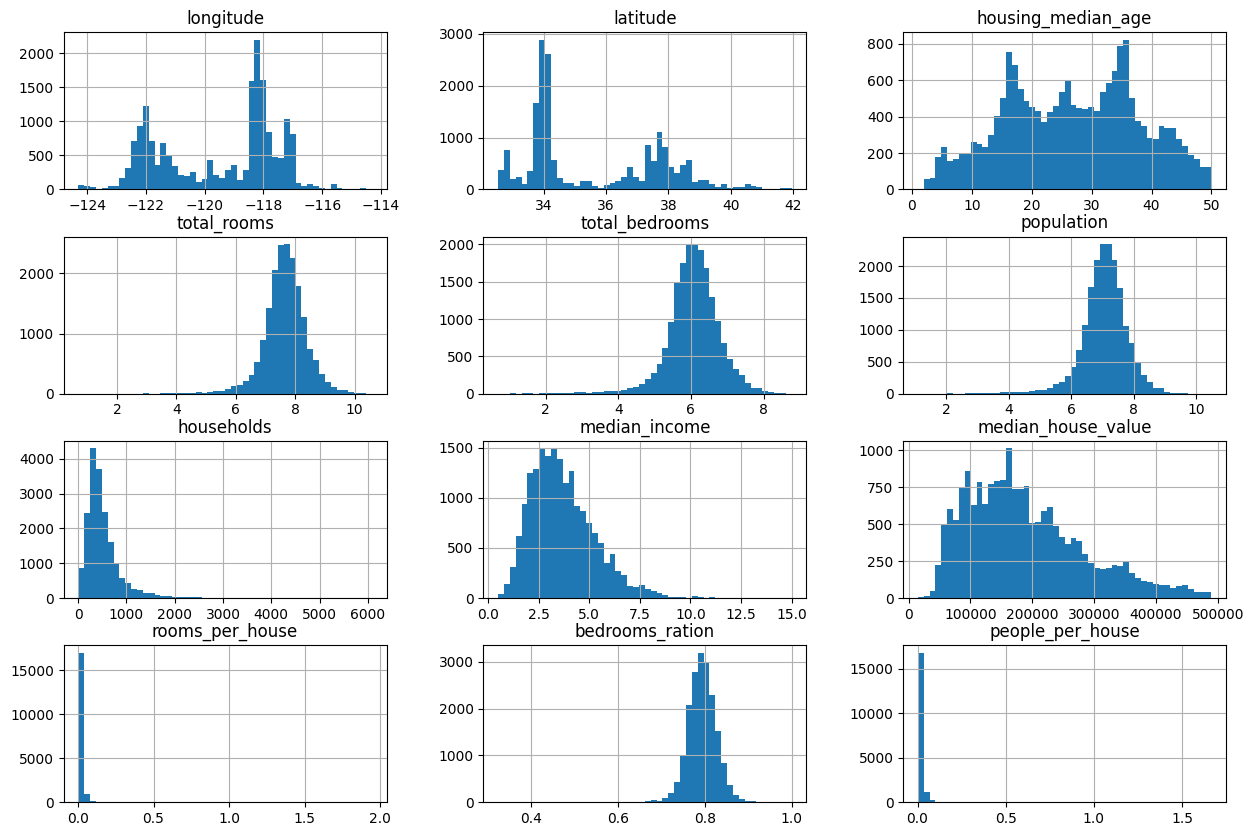

In [ ]:
hous.hist(bins = 50,figsize = (15,10));

(array([2.000e+00, 5.000e+00, 4.000e+00, 6.000e+00, 3.200e+01, 6.500e+01,
        1.540e+02, 1.429e+03, 1.436e+04, 2.229e+03]),
 array([-0.36651292, -0.11271586,  0.14108119,  0.39487825,  0.64867531,
         0.90247237,  1.15626943,  1.41006648,  1.66386354,  1.9176606 ,
         2.17145766]),
 <BarContainer object of 10 artists>)

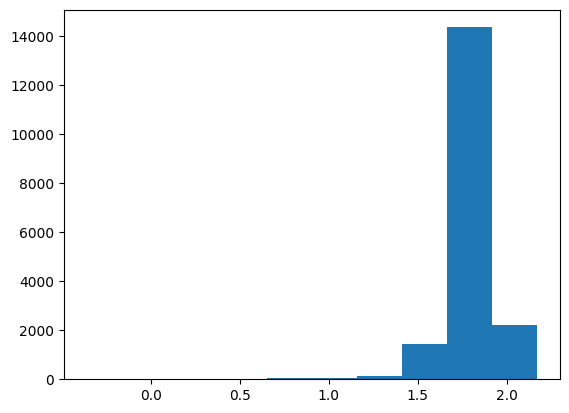

In [ ]:
plt.hist(np.log(hous["total_bedrooms"]))

In [ ]:
hous = hous.drop(hous[hous["housing_median_age"] > 50].index)
hous = hous.drop(hous[hous["median_house_value"] > 500000].index)


In [ ]:
hous["total_bedrooms"] = np.log(hous["total_bedrooms"])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
hous["total_rooms"] = np.log(hous["total_rooms"])

In [ ]:
hous["population"] = np.log(hous["population"])

In [ ]:
hous["bedrooms_ration"] = np.log(hous["bedrooms_ration"])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
hous["households"] = np.log(hous["households"])

In [ ]:
num_features = X_train.select_dtypes(include = [np.number]).columns

In [ ]:
num_pipeline = Pipeline([
    ("impute",SimpleImputer(strategy = "median")),
    ("scaler",StandardScaler())
])

transformer = ColumnTransformer([
    ("num_pipeline",num_pipeline,num_features)
])

In [ ]:
X_train_transformed = transformer.fit_transform(X_train)
feature_names = transformer.get_feature_names_out()
X_train_transformed_df = pd.DataFrame(X_train_transformed,columns = feature_names)

In [ ]:
X_test_transformed = transformer.transform(X_test)
X_test_transformed_df = pd.DataFrame(X_test_transformed,columns = feature_names)

In [ ]:
rnd_reg = RandomForestRegressor()
np.random.seed(42)
rnd_reg.fit(X_train_transformed_df,y_train)

RandomForestRegressor()

In [ ]:
rnd_reg.score(X_test_transformed_df,y_test)

0.7957110670967195

In [ ]:
rnd_reg.score(X_train_transformed_df,y_train)

0.9702485295706677

In [ ]:
#############################################################################################333

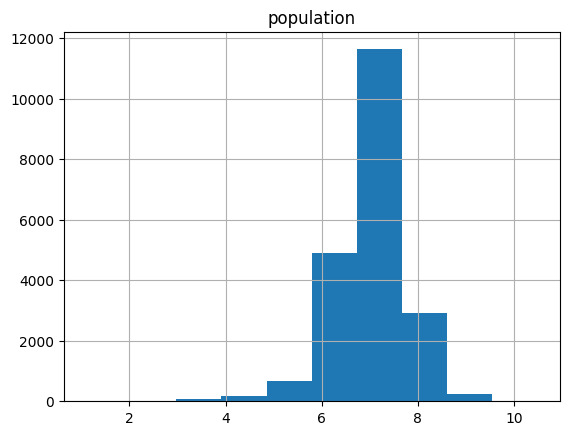

In [ ]:
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log,inverse_func=np.exp)
log_pop = log_transformer.transform(hous[["population"]])
log_pop.hist();

In [ ]:
from sklearn.compose import make_column_selector
from sklearn.pipeline import make_pipeline


def column_ratio(X):
  return X[:,[0]]/X[:,[1]]

def ratio_name(function_transformer,feature_names_in):
  return ["ratio"] #feature names out

def ratio_pipeline():
  return make_pipeline(
      SimpleImputer(strategy="median"),
      FunctionTransformer(column_ratio,feature_names_out=ratio_name),
      StandardScaler())

log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log,feature_names_out="one-to-one"),
    StandardScaler())

default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                                     StandardScaler())
preprocessing = ColumnTransformer([
    ("bedrooms",ratio_pipeline(),["total_bedrooms","total_rooms"]),
    ("rooms_per_house",ratio_pipeline(),["total_rooms","households"]),
    ("people_per_house",ratio_pipeline(),["population","households"]),
    ("log",log_pipeline,["total_bedrooms","total_rooms","population",
                           "households","median_income"]),
    ("cat",cat_pipeline,make_column_selector(dtype_include=object)),

],
remainder=default_num_pipeline)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
7528,-121.47,38.56,51.0,2083.0,559.0,874.0,524.0,2.0221,INLAND
16878,-121.59,39.77,24.0,1535.0,276.0,664.0,273.0,2.3068,INLAND
14871,-119.84,34.45,26.0,4424.0,616.0,1839.0,601.0,6.3654,NEAR OCEAN
7606,-122.44,37.74,52.0,2074.0,366.0,909.0,394.0,4.8382,NEAR BAY
16137,-116.46,33.82,6.0,4863.0,920.0,3010.0,828.0,3.9508,INLAND
...,...,...,...,...,...,...,...,...,...
12556,-117.96,33.75,14.0,2509.0,611.0,1814.0,547.0,2.7986,<1H OCEAN
14672,-118.11,33.95,34.0,2319.0,334.0,941.0,356.0,6.4319,<1H OCEAN
19329,-117.09,33.12,11.0,567.0,184.0,620.0,163.0,2.5284,<1H OCEAN
3604,-118.44,33.79,27.0,2141.0,260.0,635.0,240.0,11.6648,NEAR OCEAN


In [ ]:

X_train_transformed = preprocessing.fit_transform(X_train)
X_test_transformed = preprocessing.fit_transform(X_test)

feature_names = preprocessing.get_feature_names_out()

X_train_transformed_df = pd.DataFrame(X_train_transformed,columns = feature_names)
X_test_transformed_df = pd.DataFrame(X_test_transformed,columns = feature_names)
X_train_transformed_df

,bedrooms__ratio,rooms_per_house__ratio,people_per_house__ratio,log__total_bedrooms,log__total_rooms,log__population,log__households,log__median_income,cat__ocean_proximity_<1H OCEAN,cat__ocean_proximity_INLAND,cat__ocean_proximity_ISLAND,cat__ocean_proximity_NEAR BAY,cat__ocean_proximity_NEAR OCEAN,remainder__longitude,remainder__latitude,remainder__housing_median_age
0,0.877829,-0.623059,-0.128878,0.380754,0.018521,-0.342367,0.385535,-1.149764,0.0,1.0,0.0,0.0,0.0,-0.954335,1.374097,1.775615
1,-0.542544,0.086725,-0.058948,-0.592088,-0.389442,-0.715628,-0.508703,-0.869395,0.0,1.0,0.0,0.0,0.0,-1.014330,1.940689,-0.367456
2,-1.193145,0.835643,-0.001519,0.514598,1.025114,0.668073,0.573571,1.291012,0.0,0.0,0.0,0.0,1.0,-0.139400,-0.550441,-0.208710
3,-0.596017,-0.067832,-0.070397,-0.203043,0.012734,-0.289034,-0.005532,0.707106,0.0,0.0,0.0,1.0,0.0,-1.439297,0.990126,1.854988
4,-0.392115,0.194636,0.051125,1.067533,1.151549,1.337336,1.013021,0.275830,0.0,1.0,0.0,0.0,0.0,1.550466,-0.845443,-1.796169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,0.479430,-0.359549,0.021938,0.503364,0.267184,0.649481,0.444450,-0.458056,1.0,0.0,0.0,0.0,0.0,0.800526,-0.878221,-1.161186
16508,-1.116365,0.470730,-0.039640,-0.329161,0.161948,-0.242039,-0.144629,1.313133,1.0,0.0,0.0,0.0,0.0,0.725532,-0.784570,0.426274
16509,1.778443,-0.837031,0.066534,-1.151002,-1.720358,-0.808757,-1.216009,-0.674163,1.0,0.0,0.0,0.0,0.0,1.235491,-1.173223,-1.399305
16510,-1.478667,1.507622,-0.039405,-0.674408,0.055222,-0.776286,-0.685396,2.580210,0.0,0.0,0.0,0.0,1.0,0.560545,-0.859491,-0.129337


In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

models = [
    LinearRegression(),
    SVR(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
]

for model in models:
  model.fit(X_train_transformed_df,y_train)
  print(model.__class__.__name__,model.score(X_test_transformed_df,y_test))


LinearRegression 0.5894586561661734
SVR -0.0502555674008196
DecisionTreeRegressor 0.5875614232987464
RandomForestRegressor 0.7879523611061282
GradientBoostingRegressor 0.7681490315590733


In [ ]:
random_forest_pipeline = Pipeline([
    ("preprocessing",preprocessing),
    ("random_forest",RandomForestRegressor())
])
random_forest_pipeline.fit(X_train,y_train)
random_forest_pipeline.score(X_test,y_test)

0.8220298259551416